<a href="https://colab.research.google.com/github/irinap9270/hg_ml/blob/main/Ch8-3.%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가중치 시각화

In [29]:
# 체크포인트 파일 읽어오기
from tensorflow import keras
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
model = keras.models.load_model('best-cnn-model.h5')
# 모델 확인
model.layers

--2024-06-06 05:41:41--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2024-06-06 05:41:42--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4046712 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.1’

best-cnn-model.h5.1 100%[===================>]   3.86M  --.-KB/s    in 0.08s   

2024-06-06 05:41:42 (45.7 MB/s) - ‘best-cnn-model.h5.1’ saved [4046712/4046712]



(3, 3, 1, 32) (32,)
-0.02494116 0.24951957


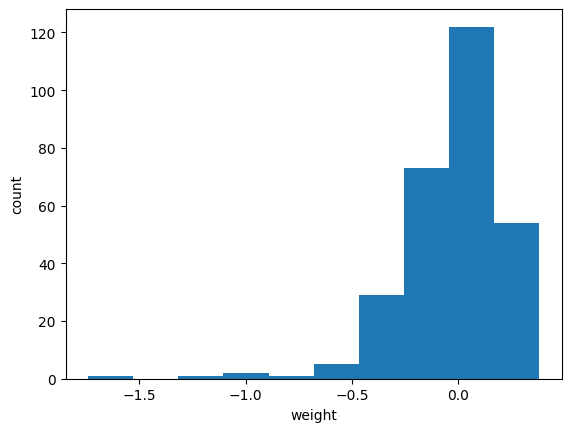

In [30]:
# 첫 번째 합성곱 층의 가중치 크기 출력
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

# 넘파이 배열로 변환
conv_weights = conv.weights[0].numpy()
# 가중치의 평균과 표준편차 출력
print(conv_weights.mean(), conv_weights.std())

# 가중치의 히스토그램(분포) 출력
import matplotlib.pyplot as plt
# 일 차원 배열을 입력으로 받음
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

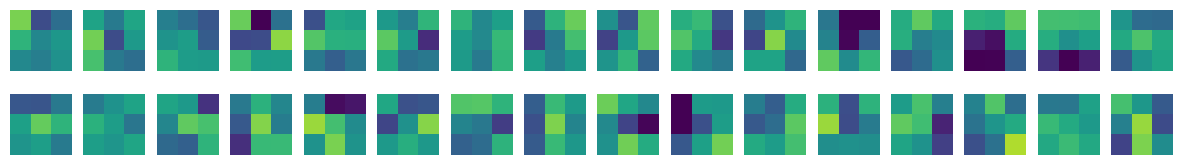

In [31]:
# 32개 커널을 출력해보자
# subplot() ; 그래프 영역을 만듦
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        # imshow() ; 배열에 있는 최댓값과 최솟값을 사용해 픽셀의 강도 표현
        # vmin, vmax를 이용해 표현 범위 지정
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()


# 훈련하지 않은 모델과 비교

(3, 3, 1, 32)
-0.006654213 0.08047465


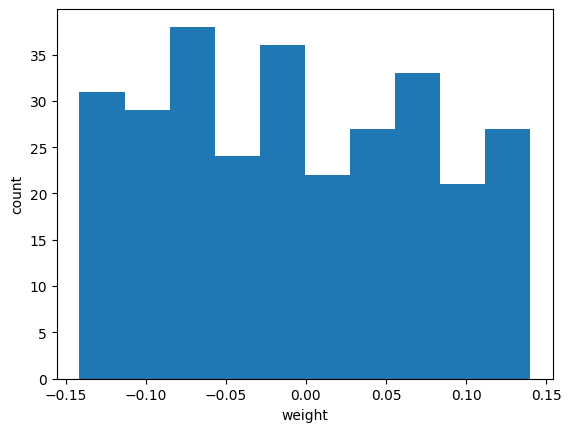

In [32]:
# 훈련하지 않은 모델 생성
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

# 첫번째 층의 가중치 출력
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

# 가중치의 평균, 표준편차 출력
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

# 가중치 배열 히스토그램 출력
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

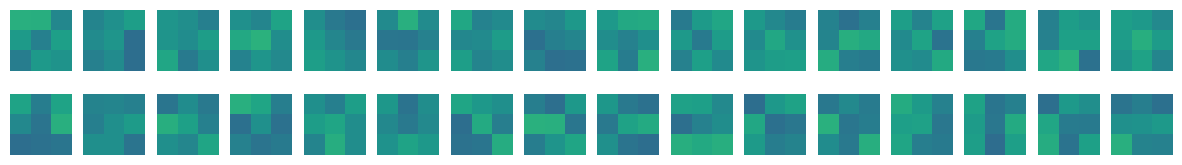

In [33]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

# 함수형 API

In [34]:
print(model.input)

# 모델 생성
conv_acti = keras.Model(model.input, model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


# 특성 맵 시각화

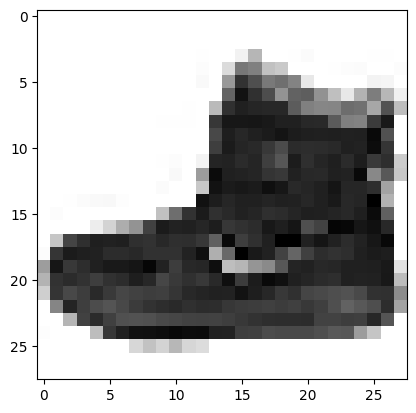

In [35]:
# 데이터 읽어오기
(train_input, trian_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 첫 번째 샘플 출력
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [37]:
# 전처리
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

# feature map 크기 확인
print(feature_maps.shape)

1/1 [==============================] - 0s 191ms/step
(1, 28, 28, 32)


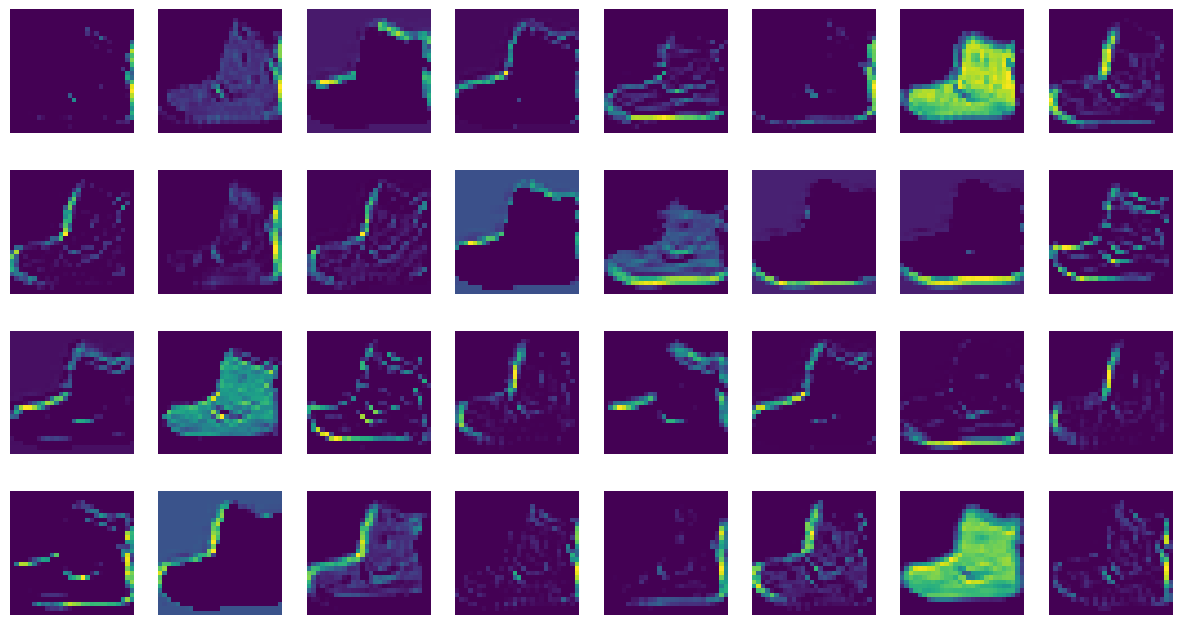

In [38]:
# feature map 출력
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()